In [35]:
import pandas as pd

In [36]:
df = pd.read_csv('../data/togo-dapaong_qc.csv', 
                 encoding='ISO-8859-1', 
                 parse_dates=['Timestamp'])

df.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [37]:
# Total number of rows
total_rows = len(df)

# Percentage of missing values per column
missing_percent = df.isnull().sum() / total_rows * 100

# Filter columns with more than 5% missing values
missing_over_5 = missing_percent[missing_percent > 5]

print("📌 Columns with >5% missing values:")
print(missing_over_5)

📌 Columns with >5% missing values:
Comments    100.0
dtype: float64


In [38]:
# Show data types
print("📋 Column Data Types:")
print(df.dtypes)

📋 Column Data Types:
Timestamp        datetime64[ns]
GHI                     float64
DNI                     float64
DHI                     float64
ModA                    float64
ModB                    float64
Tamb                    float64
RH                      float64
WS                      float64
WSgust                  float64
WSstdev                 float64
WD                      float64
WDstdev                 float64
BP                        int64
Cleaning                  int64
Precipitation           float64
TModA                   float64
TModB                   float64
Comments                float64
dtype: object


In [39]:
df.info()
df.describe()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14  Cleaning       525600 non-null  int64         
 15  

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [40]:
null_report = df.isna().mean().sort_values(ascending=False)
null_report[null_report > 0.05]
null_report

Comments         1.0
WSstdev          0.0
TModB            0.0
TModA            0.0
Precipitation    0.0
Cleaning         0.0
BP               0.0
WDstdev          0.0
WD               0.0
Timestamp        0.0
GHI              0.0
WS               0.0
RH               0.0
Tamb             0.0
ModB             0.0
ModA             0.0
DHI              0.0
DNI              0.0
WSgust           0.0
dtype: float64

In [41]:
df.drop(columns=['Comments'], inplace=True)

In [42]:
from scipy.stats import zscore

cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = df[cols].apply(zscore)

# Flag rows with |Z| > 3
outliers = (z_scores.abs() > 3)
outlier_counts = outliers.sum()

In [43]:
df.to_csv('../data/togo_clean.csv', index=False)

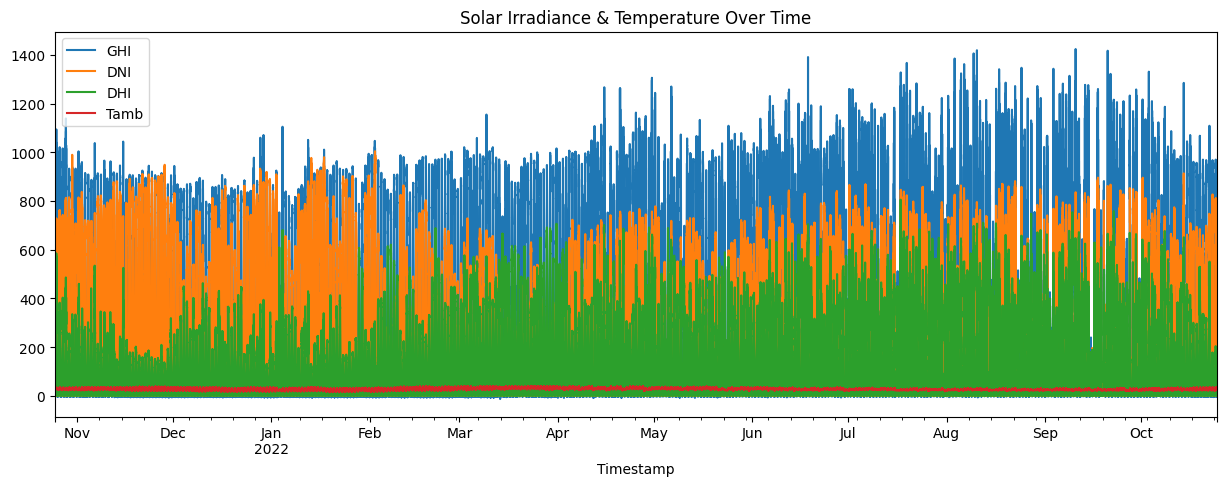

In [44]:
import matplotlib.pyplot as plt

df.set_index('Timestamp')[['GHI', 'DNI', 'DHI', 'Tamb']].plot(figsize=(15,5))
plt.title('Solar Irradiance & Temperature Over Time')
plt.show()

<Axes: xlabel='Timestamp'>

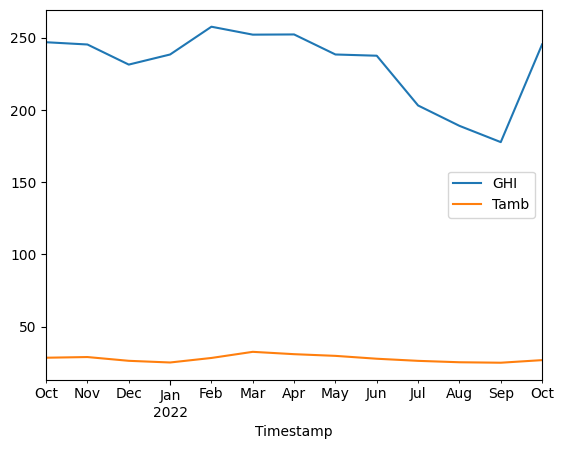

In [45]:
monthly_avg = df.resample('ME', on='Timestamp').mean()
monthly_avg[['GHI', 'Tamb']].plot()

<Axes: xlabel='Cleaning'>

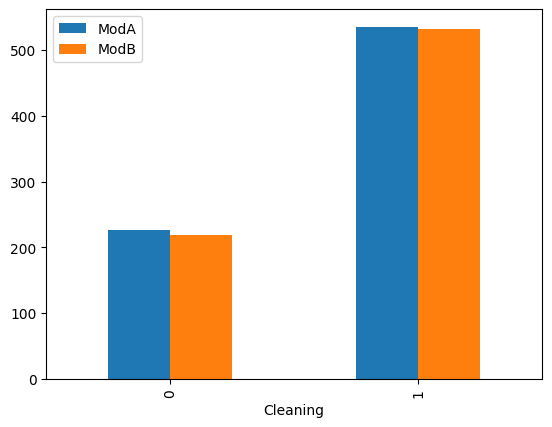

In [46]:
df.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='bar')

<Axes: >

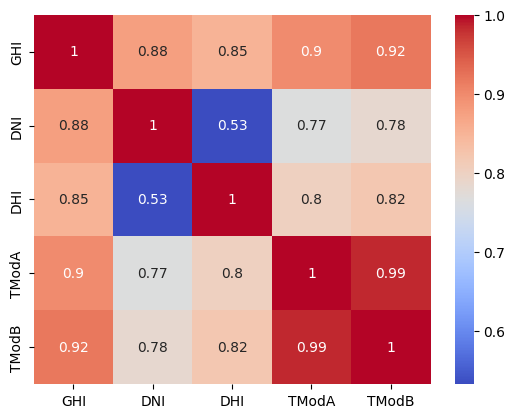

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation = df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')

<Axes: xlabel='WS', ylabel='GHI'>

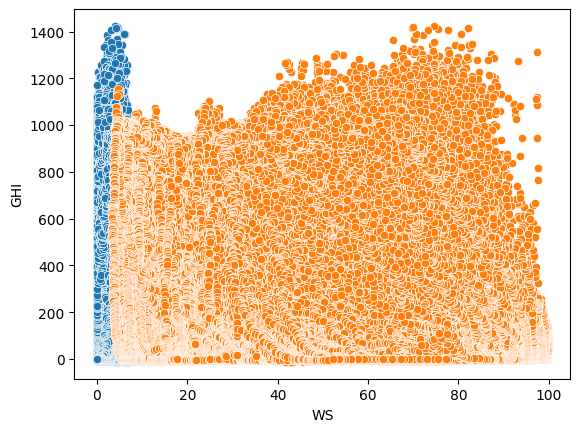

In [48]:
sns.scatterplot(data=df, x='WS', y='GHI')
sns.scatterplot(data=df, x='RH', y='GHI')

Text(0.5, 1.0, 'Wind Rose')

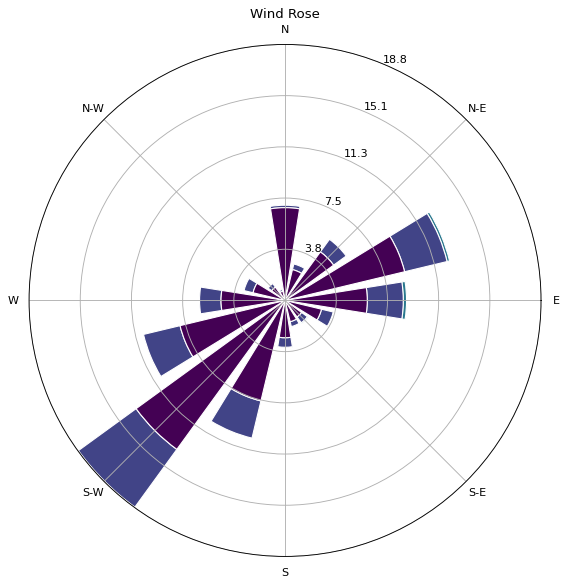

In [49]:
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_title("Wind Rose")

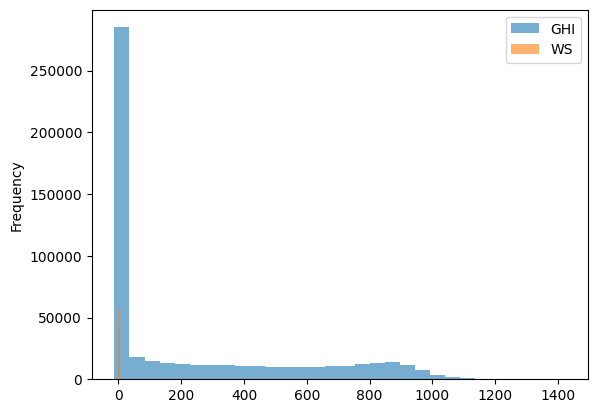

In [50]:
df['GHI'].plot(kind='hist', bins=30, alpha=0.6, label='GHI')
df['WS'].plot(kind='hist', bins=30, alpha=0.6, label='WS')
plt.legend()

<Axes: xlabel='RH', ylabel='Tamb'>

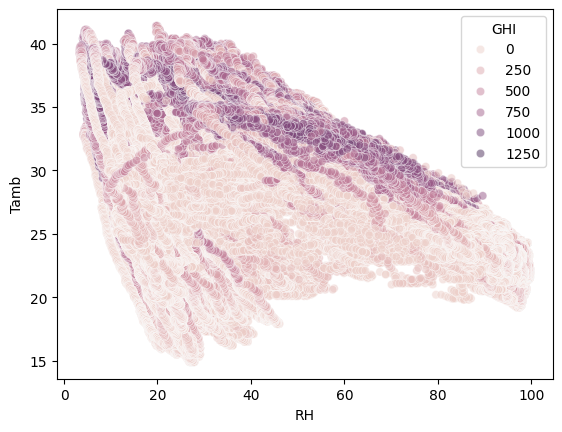

In [51]:
sns.scatterplot(data=df, x='RH', y='Tamb', hue='GHI', alpha=0.5)